In [1]:
import sys
import numpy as np, matplotlib.pyplot as plt
sys.path.append('/public4/home/sc57082/local')
import glio 
import galpy
from astropy import units
from galpy.df import kingdf

In [2]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

In [11]:
m = 1e-4
npart0 = 0
npart1 = 0
npart2 = 0
npart3 = 200000
kdf= kingdf(M=m*1e10*units.Msun,rt=4*units.kpc,W0=8.)
sam= kdf.sample(n=int(2e5))
print(sam.shape)
pos = np.c_[sam.x(),sam.y(),sam.z()]
vel = np.c_[sam.vx(),sam.vy(),sam.vz()]
mass = np.array([m/npart3]*npart3)
print(pos.shape)

(200000,)
(200000, 3)


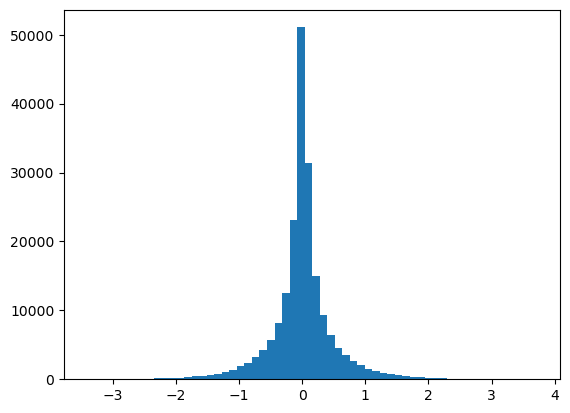

(array([2.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 9.0000e+00, 2.7000e+01, 3.6000e+01, 6.0000e+01,
        7.8000e+01, 1.4500e+02, 2.1100e+02, 2.9900e+02, 4.3400e+02,
        6.3200e+02, 8.9100e+02, 1.2320e+03, 1.6350e+03, 2.1890e+03,
        2.8010e+03, 3.7080e+03, 4.6350e+03, 5.6470e+03, 6.8280e+03,
        8.1610e+03, 9.5320e+03, 1.0980e+04, 1.2520e+04, 1.3183e+04,
        1.3911e+04, 1.3988e+04, 1.3190e+04, 1.2251e+04, 1.1008e+04,
        9.6990e+03, 8.4290e+03, 6.8820e+03, 5.7540e+03, 4.6160e+03,
        3.5990e+03, 2.7560e+03, 2.1570e+03, 1.6850e+03, 1.2330e+03,
        9.3400e+02, 6.4400e+02, 4.7600e+02, 3.1500e+02, 2.0900e+02,
        1.4900e+02, 9.1000e+01, 5.2000e+01, 4.5000e+01, 1.7000e+01,
        1.2000e+01, 4.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([-6.08656989, -5.89044191, -5.69431392, -5.49818594, -5.30205796,
        -5.10592998, -4.90980199, -4.71367401, -4.51754603, -4.32141805,
        -4.12529006, -3.92916208, -3

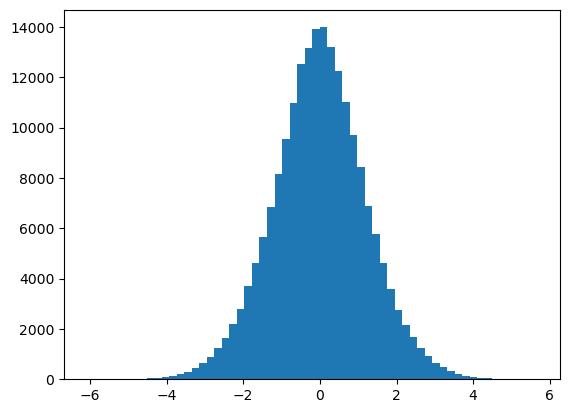

In [12]:
plt.hist(sam.x(),bins=60)
plt.show()
plt.hist(sam.vx(),bins=60)

In [13]:
s = glio.GadgetSnapshot(None)
s.header.npart = np.array([0, npart1, npart2, npart3, 0, 0]).astype('int')
s.header.num_files = np.array([1]).astype('int')

if npart3!=0:
    s.pos[3]  = pos.astype('float32')
    s.vel[3]  = vel.astype('float32')
    s.mass[3] = mass.astype('float32')
    s.ID[3]   = np.arange(npart3).astype('uint32') + npart0 + npart1 + npart2 +1

print(s.mass[3])
foutput = '/public4/home/sc57082/GC/ICs/cusp/ndm8.ini'
s.save(foutput)

[5.e-10 5.e-10 5.e-10 ... 5.e-10 5.e-10 5.e-10]
